<a href="https://colab.research.google.com/github/krrakenn/Fraud-Detection/blob/main/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOM doesn't have implementation in ScikitLearn

## Install MiniSom from pip

In [ ]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=41d0311aa7b50d5c299d493bbe2e50b0dddc6e5c2495230abe37f073a04153b6
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built MiniSom


## Import the libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom

## Import Dataset

In [ ]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

## Training SOM

In [ ]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
# x any y are the grid-dimensions which we want to make (x*y)
# input_len is the number of variables, in our case 14+1 (+1 is the customer ID coz we want it in future)
# sigma is the radius of the circle of neighbour in grid which will be made
# learning_rate specifies by how much the weights will be updated during each iteration higher the rate, higher the convergance
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)
# num_iteration can be compared to Epochs

## Visualizing test results

[[0.1308234  0.27612431 0.35978683 0.43667371 0.42116127 0.41431507
  0.4108248  0.47521593 0.55603526 0.36488663]
 [0.3626903  0.54664822 0.64316911 0.69674421 0.63707099 0.60205194
  0.6324701  0.65949898 0.8325613  0.5105414 ]
 [0.42694393 0.63575816 0.63724334 0.72223971 0.74627894 0.51972944
  0.53575358 0.56068291 0.60347984 0.49510124]
 [0.47114342 0.65741596 0.52529172 0.59979465 0.68813203 0.7013229
  0.46459721 0.38998546 0.52779527 0.38829779]
 [0.47079405 0.72383192 0.65813759 0.72104415 0.90232108 0.54174803
  0.46317734 0.40002233 0.43350755 0.44263458]
 [0.45385178 0.73969252 0.67910586 0.69524314 0.77907482 0.7689863
  0.57830266 0.48448208 0.51166634 0.37944073]
 [0.50665402 0.74537042 0.64245283 0.63273964 0.75268686 0.75025114
  0.69800606 0.69578067 0.5577677  0.34199198]
 [0.4495492  0.71899646 0.66357176 0.72358274 0.97677833 0.73326487
  0.69179042 0.67084867 0.57239651 0.37888066]
 [0.42669083 0.6596023  0.78001291 1.         0.76644085 0.76851057
  0.64804309 0

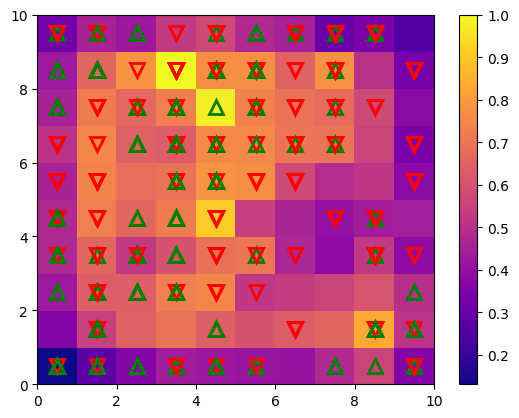

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
x=som.distance_map().T
print(x)
fr=[]
fc=[]
for row in range(x.shape[0]):
  for column in range(x.shape[1]):
    if(x[row][column]>=0.9):
      fr.append(row)
      fc.append(column)
if(len(fr)>3):
  fr=[]
  fc=[]
  for row in range(x.shape[0]):
    for column in range(x.shape[1]):
      if(x[row][column]>=0.93):
        fr.append(row)
        fc.append(column)
elif(len(fr)<3):
  fr=[]
  fc=[]
  for row in range(x.shape[0]):
    for column in range(x.shape[1]):
      if(x[row][column]>=0.87):
        fr.append(row)
        fc.append(column)
print(fr)
print(fc)
pcolor(x,cmap='plasma')
colorbar()
markers = ['v', '^']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

'''
'plasma'
'inferno'
'magma'
'cividis'
'cool'
'hot'
'spring'
'summer'
'autumn'
'winter'
'coolwarm'
'viridis'
'RdBu'
'jet'
'rainbow'
'hsv'
'twilight'
'twilight_shifted'
'nipy_spectral'
'gist_ncar'
'gist_rainbow'
'gist_stern'
'brg'
'gist_earth'
'terrain'
'ocean'
'gnuplot'
'gnuplot2'
'CMRmap'
'cubehelix'
'gnuplot2_r'
'ocean_r'
'rainbow_r'
'nipy_spectral_r'
'terrain_r'
'gist_earth_r'
'gist_stern_r'
'gist_rainbow_r'
'brg_r'
'hsv_r'
'twilight_r'
'twilight_shifted_r'
'''
# are some options
'''
som.distance_map() returns a matrix, and the .T is applied to transpose it.
This is necessary because when you use the pcolor function,
it expects the matrix to be oriented in a specific way,
with rows representing the X-axis and columns representing the Y-axis.
By transposing the matrix, you ensure that it aligns correctly with the expected orientation for the plot.
'''

## Finding out frauds

In [ ]:
mappings = som.win_map(X) #win map is used to get all the customers related to particular winning node
#frauds = np.concatenate((mappings[(5,2)], mappings[(6,2)],mappings[(4,3)],mappings[(5,3)]), axis = 0)
#print(frauds)
frauds=np.array([[1,2,3,4,5,6,7,8,9,1,2,3,4,5,6]])
for i in range(len(fc)):
  frauds=np.concatenate((frauds,mappings[(fc[i],fr[i])]),axis=0)
frauds=np.delete(frauds,0,axis=0)
#print(frauds)
frauds = sc.inverse_transform(frauds)
#print(frauds)

## Printing fraud customers

In [ ]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15594305
15664793
15670029
15662189
15696361
15568469
15586479
15646535
15790113
15767729
15711446
15787693
15688210
15793366
15735106
15688059
15683276
15642001
15768777
15791326
15779586
15730150


In [ ]:
customers = dataset.iloc[:, 1:].values

"""## Create Dependent Variable"""

is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

"""#Part 3 - ANN

### Feature Scaling
"""

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

"""## Building the ANN

##Import Tensorflow
"""

import tensorflow as tf
tf.__version__

"""## Initializing the ANN"""

ann = tf.keras.models.Sequential()

"""##Adding the input layer and the first hidden layer"""

ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

"""## Adding the output layer"""

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

"""## Training the ANN

## Compiling the ANN
"""

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

"""## Training the ANN on the Training set"""

ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

"""## Predicting test set results"""

y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

print(y_pred)

Epoch 1/10
690/690 [==============================] - 2s 2ms/step - loss: 0.9511 - accuracy: 0.5913
Epoch 2/10
690/690 [==============================] - 1s 2ms/step - loss: 0.4572 - accuracy: 0.9261
Epoch 3/10
690/690 [==============================] - 1s 2ms/step - loss: 0.3154 - accuracy: 0.9667
Epoch 4/10
690/690 [==============================] - 1s 2ms/step - loss: 0.2475 - accuracy: 0.9681
Epoch 5/10
690/690 [==============================] - 2s 2ms/step - loss: 0.2082 - accuracy: 0.9681
Epoch 6/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1842 - accuracy: 0.9681
Epoch 7/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1692 - accuracy: 0.9681
Epoch 8/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1598 - accuracy: 0.9681
Epoch 9/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1537 - accuracy: 0.9681
Epoch 10/10
22/22 [==============================] - 0s 1ms/step
[[1.57761560e+07 5.73297590e-02]
 [